In [1]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import pandas as pd
import itertools
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
afks_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/AFKS.ME.csv'
agro_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/AGRO.ME.csv'
alrs_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/ALRS.ME.csv'
chmf_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/CHMF.ME.csv'
dsky_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/DSKY.ME.csv'
fesh_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/FESH.ME.csv'
five_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/FIVE.ME.csv'
gazp_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/GAZP.ME.csv'
lnta_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/LNTA.ME.csv'
mdmg_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MDMG.ME.csv'
mgnt_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MGNT.ME.csv'
moex_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MOEX.ME.csv'
mvid_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MVID.ME.csv'
nlmk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/NLMK.ME.csv'
pikk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/PIKK.ME.csv'
poly_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/POLY.ME.csv'
rtkm_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/RTKM.ME.csv'
sber_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/SBER.ME.csv'
tcsg_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/TCSG.ME.csv'
ttlk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/TTLK.ME.csv'
yndx_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/YNDX.ME.csv'
imoex_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/IMOEX.ME.csv'
laplas = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/LaplaseTable.csv'
q_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/q_table.csv'

In [3]:
afks = pd.read_csv(afks_url)
agro = pd.read_csv(agro_url)
alrs = pd.read_csv(alrs_url)
chmf = pd.read_csv(chmf_url)
dsky = pd.read_csv(dsky_url)
fesh = pd.read_csv(fesh_url)
five = pd.read_csv(five_url)
gazp = pd.read_csv(gazp_url)
lnta = pd.read_csv(lnta_url)
mgnt = pd.read_csv(mgnt_url)
moex = pd.read_csv(moex_url)
mvid = pd.read_csv(mvid_url)
nlmk = pd.read_csv(nlmk_url)
pikk = pd.read_csv(pikk_url)
poly = pd.read_csv(poly_url)
rtkm = pd.read_csv(rtkm_url)
sber = pd.read_csv(sber_url)
tcsg = pd.read_csv(tcsg_url)
ttlk = pd.read_csv(ttlk_url)
yndx = pd.read_csv(yndx_url)
imoex = pd.read_csv(imoex_url)

In [4]:
imoex = imoex.fillna(1)

In [5]:
start_date = pd.to_datetime("2020-11-25")
C_0 = 1000000

In [6]:
companies = [afks, agro, alrs, chmf, dsky, five, gazp, lnta, mgnt, moex, mvid, nlmk, pikk, poly, rtkm, sber, tcsg, ttlk, yndx, imoex]
labels = ["АФК Система", "РусАгро", "Алроса", "Северсталь", "Детский мир", "Х5 груп", "Газпром", "Лента", "Магнит", "Московская биржа", "МВидео", "НЛМК", "ПИК", "Polymetal", "РосТелеКом", "Сбербанк", "TCS Group", "Яндекс", "Индекс Мосбиржи"]

In [38]:
fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(200, 200))
for comp, pos, lab in zip(companies, itertools.product(range(6), range(3)), labels):
    trend = []
    for i in range(comp.shape[0]):
        trend.append(comp.Close.iloc[:i].mean())
    comp['Trend'] = trend
    sns.lineplot(data=comp[['Date', 'Close', 'Trend']], legend=False, linewidth=4, ax=axes[pos[0], pos[1]])
    axes[pos[0], pos[1]].set_title(lab, fontsize=72)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [8]:
def covariation(X, Y):
    T = X.shape[0]
    X = X.to_numpy()
    Y = Y.to_numpy()
    return ((X - X.mean()) * (Y - Y.mean())).sum()/(T - 1)

In [9]:
m_i = []
std_i = []
cov_i = []
beta_i = []
alpha_i = []
psi_i = []
for comp in companies:
    comp.Date = pd.to_datetime(comp.Date)
    comp['Profitability'] = 100 * (comp['Close'] - comp['Open'])/comp['Open']
    mi = comp['Profitability'][comp.Date > start_date].mean()
    m_i.append(mi)
    std_i.append(comp['Profitability'][comp.Date > start_date].std())
    covi = covariation(comp['Profitability'][comp.Date > start_date], ((companies[-1]['Close'] - companies[-1]['Open'])/companies[-1]['Open'])[comp.Date > start_date])
    cov_i.append(covi)
    betai = covi/(std_i[-1] ** 2)
    beta_i.append(betai)
    alphai = mi - betai * ((companies[-1]['Close'] - companies[-1]['Open'])/companies[-1]['Open'])[comp.Date > start_date].mean()
    alpha_i.append(alphai)
    psii = ((comp['Profitability'][comp.Date > start_date] - alphai - betai * ((companies[-1]['Close'] - companies[-1]['Open'])/companies[-1]['Open'])[comp.Date > start_date])**2).sum()/(comp.shape[0] - 2)
    psi_i.append(psii)

In [10]:
m_o = []
s_o = []
for i in range(len(companies) - 1):
    m_o.append(alpha_i[i] + beta_i[i] * m_i[-1])
    s_o.append((beta_i[i]**2 * std_i[-1]**2 + psi_i[i])**(1/2))
ans = pd.DataFrame({'m': m_o, 'risk': s_o}, index=labels)
ans

m      risk
АФК Система      -0.079994  0.822343
РусАгро          -0.035002  0.664810
Алроса           -0.032006  0.764907
Северсталь        0.026239  0.722273
Детский мир       0.202784  1.031577
Х5 груп          -0.239603  0.722615
Газпром           0.075383  0.690311
Лента             0.208617  0.817870
Магнит           -0.056525  0.743512
Московская биржа  0.215159  0.801042
МВидео            0.108073  0.917752
НЛМК             -0.130921  0.919757
ПИК               0.258242  0.781035
Polymetal        -0.350677  0.892069
РосТелеКом        0.028992  0.492242
Сбербанк         -0.075247  0.701884
TCS Group         0.061695  1.473213
Яндекс            0.188923  0.914382
Индекс Мосбиржи  -0.109407  0.737168

In [11]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
import statsmodels.api as sm
import pylab
from scipy.stats import kstest


def is_normal(x):
    ans = []
    data = x['Profitability'][x.Date > start_date]
    stat, p = shapiro(data)
    stat1, p1 = normaltest(data)
    result = anderson(data)
    ks_statistic, p_value = kstest(data, 'norm')
    alpha = 0.05
    print("----Shapiro test-----")
    if p > alpha:
        ans.append(1)
        print(f'Sample looks Gaussian (fail to reject H0) with p={p}')
    else:
        ans.append(0)
        print(f'Sample does not look Gaussian (reject H0) with p={p}')
    print("----D'Agostino test-----")
    if p1 > alpha:
        ans.append(1)
        print(f'Sample looks Gaussian (fail to reject H0) with p={p1}')
    else:
        ans.append(0)
        print(f'Sample does not look Gaussian (reject H0) with p={p1}')
    print("----Kolmagorov-Smirnov test-----")
    if p_value > alpha:
        ans.append(1)
        print(f'Sample looks Gaussian (fail to reject H0) with p={p_value}')
    else:
        ans.append(0)
        print(f'Sample does not look Gaussian (reject H0) with p={p_value}')
    print("----Anderson test-----")
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            ans.append(1)
            print(f'Data looks normal (fail to reject H0) {sl} {cv}')
        else:
            ans.append(0)
            print(f'Data does not look normal (reject H0) {sl} {cv}')
    sm.qqplot(x['Profitability'][x.Date > start_date], line='45')
    pylab.show()
    if any(ans):
        return 1
    else:
        return 0

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.19209666550159454
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.7615097995574918
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.045883447338153804
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.545
Data looks normal (fail to reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


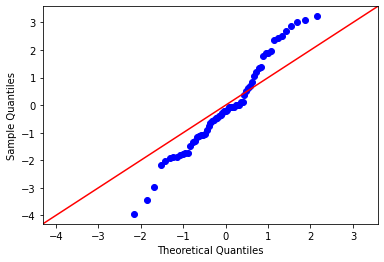

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=0.006756565999239683
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=0.01401149873164169
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.38161943974192775
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.545
Data does not look normal (reject H0) 10.0 0.621
Data does not look normal (reject H0) 5.0 0.744
Data does not look normal (reject H0) 2.5 0.868
Data does not look normal (reject H0) 1.0 1.033


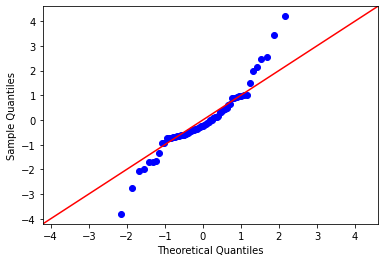

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.8341867923736572
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.8026429751071873
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.31742090524096916
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.545
Data looks normal (fail to reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


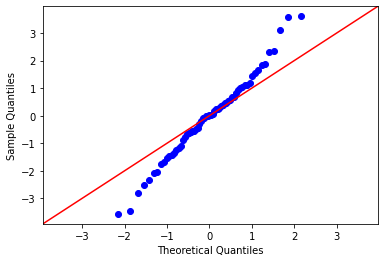

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.9392921924591064
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.989841084364653
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.33354998908443906
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.545
Data looks normal (fail to reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


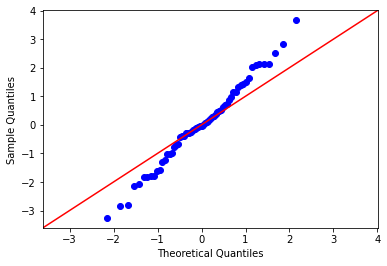

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=1.6981185524400644e-07
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=1.4920191230897956e-12
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.6343399952422868
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.545
Data does not look normal (reject H0) 10.0 0.621
Data does not look normal (reject H0) 5.0 0.744
Data does not look normal (reject H0) 2.5 0.868
Data does not look normal (reject H0) 1.0 1.033


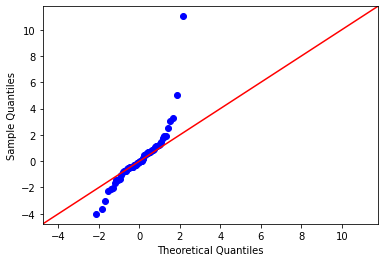

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=0.02817724086344242
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.08566018046432405
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.048873879509896294
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.545
Data does not look normal (reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


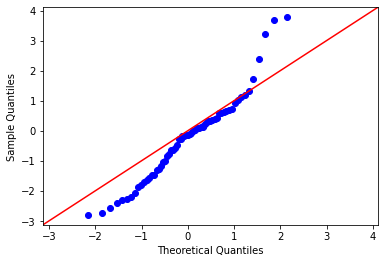

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.5024383664131165
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.6917406170551994
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.5876809473432147
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.545
Data looks normal (fail to reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


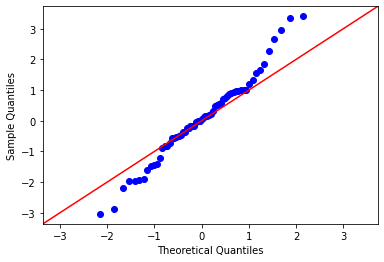

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.24973686039447784
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.4728847495640103
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.007950514548897888
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.545
Data does not look normal (reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


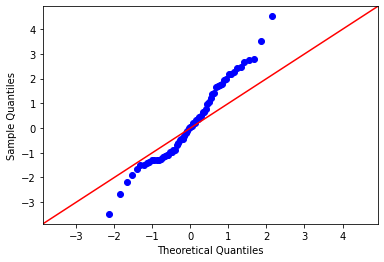

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=0.000610245973803103
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=1.1791633452140236e-06
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.491686683963481
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.545
Data does not look normal (reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


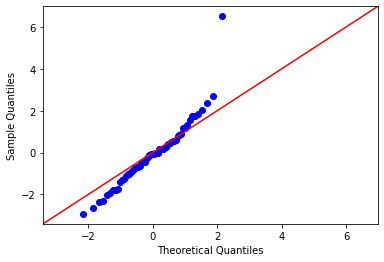

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.9935845732688904
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.9906476329503887
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.034030163246310974
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.545
Data looks normal (fail to reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


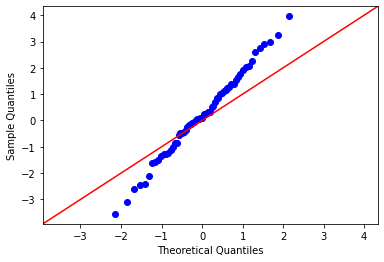

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=2.1490025119419442e-06
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=3.480167743589022e-10
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.19272434694710527
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.545
Data does not look normal (reject H0) 10.0 0.621
Data does not look normal (reject H0) 5.0 0.744
Data does not look normal (reject H0) 2.5 0.868
Data does not look normal (reject H0) 1.0 1.033


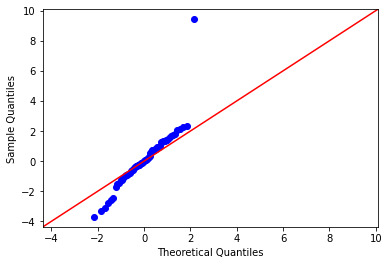

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.4362274706363678
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.5010999466363062
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.005152490006356712
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.545
Data looks normal (fail to reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


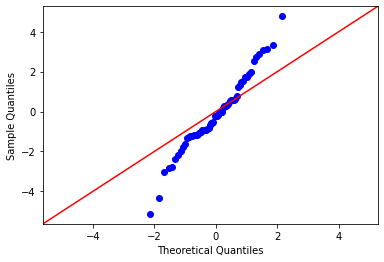

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=4.8440153477713466e-05
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=1.242061181909428e-05
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.4407100857623751
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.545
Data does not look normal (reject H0) 10.0 0.621
Data does not look normal (reject H0) 5.0 0.744
Data does not look normal (reject H0) 2.5 0.868
Data does not look normal (reject H0) 1.0 1.033


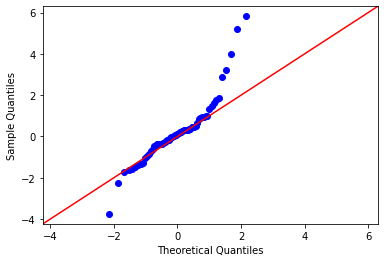

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.2759324312210083
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.07913273637207097
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.0018433787002077675
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.545
Data looks normal (fail to reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


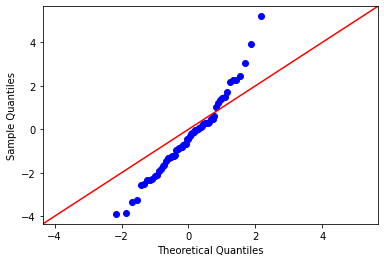

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.10275214165449142
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=0.038385822596724094
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.5766801901629476
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.545
Data does not look normal (reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


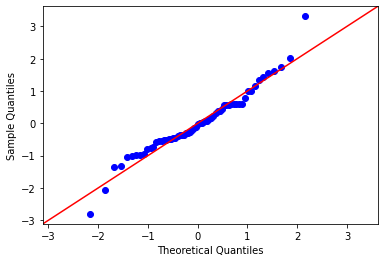

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.8538705110549927
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.9480756039795426
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.23400570696983194
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.545
Data looks normal (fail to reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


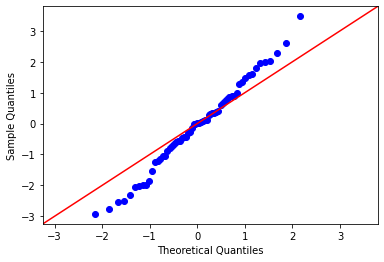

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.8891489505767822
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.4214098646414116
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.0004870049506695084
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.545
Data looks normal (fail to reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


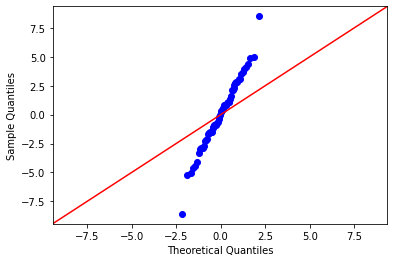

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=0.0012530665844678879
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=0.00030623289867568083
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.21882447926186993
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.545
Data does not look normal (reject H0) 10.0 0.621
Data does not look normal (reject H0) 5.0 0.744
Data does not look normal (reject H0) 2.5 0.868
Data does not look normal (reject H0) 1.0 1.033


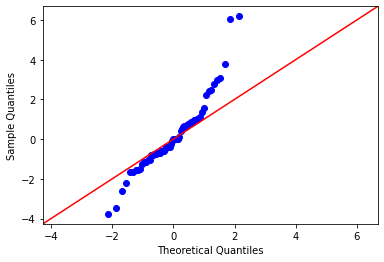

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.4828302562236786
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.2635563611542385
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.03274926349748033
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.545
Data looks normal (fail to reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


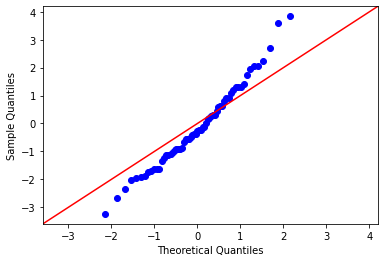

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.5424004793167114
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.8089706076011283
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.559859603298581
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.545
Data looks normal (fail to reject H0) 10.0 0.621
Data looks normal (fail to reject H0) 5.0 0.744
Data looks normal (fail to reject H0) 2.5 0.868
Data looks normal (fail to reject H0) 1.0 1.033


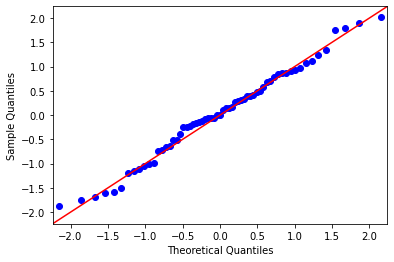

Данные о доходности всех компаний распределены нормально


In [12]:
norm = []
for i in range(20):
    norm.append(is_normal(companies[i]))
if all(norm):
    print(f'Данные о доходности всех компаний распределены нормально')
else:
    print(f'Вероятно, нужно изменить объем выборки (сейчас с: {start_date})')

In [39]:
laplas_table = pd.read_csv(laplas, sep=';')
q_table = pd.read_csv(q_url, sep=';')
def confidence_intervals(x, gamma=0.95):
    data = x['Profitability'][x.Date > start_date]
    s = data.std()
    m = data.mean()
    n = data.shape[0]
    temp = abs(laplas_table['F(x)'] - gamma/2)
    t = laplas_table[temp == temp.min()]['x'].iloc[0]
    precision = t * (s/n**(1/2))
    temp_q = abs(q_table['n']-n)
    q = q_table[temp_q == temp_q.min()][f'{gamma}'].iloc[0]
    return (round(m - precision, 4), round(m + precision, 4)), (round(s*(1-q), 4), round(s*(1+q), 4))

In [40]:
gamma = 0.95
print(f'Для уровня значимости: {gamma}')
profit = []
risk = []
for i in range(len(companies) - 1):
    m, s = confidence_intervals(companies[i], gamma=gamma)
    profit.append(m)
    risk.append(s)
ans = pd.DataFrame({'m': profit, 'risk': risk}, index=labels)
ans

Для уровня значимости: 0.95


m              risk
АФК Система       (-0.4862, 0.3261)  (1.3355, 1.9539)
РусАгро           (-0.3634, 0.2933)  (1.0797, 1.5796)
Алроса            (-0.4098, 0.3457)  (1.2422, 1.8174)
Северсталь        (-0.3305, 0.3829)   (1.173, 1.7161)
Детский мир       (-0.3067, 0.7123)   (1.6753, 2.451)
Х5 груп           (-0.5966, 0.1172)  (1.1735, 1.7169)
Газпром           (-0.2657, 0.4162)  (1.1211, 1.6402)
Лента             (-0.1953, 0.6125)  (1.3282, 1.9433)
Магнит            (-0.4238, 0.3106)  (1.2075, 1.7666)
Московская биржа  (-0.1805, 0.6107)  (1.3009, 1.9033)
МВидео            (-0.3452, 0.5613)  (1.4904, 2.1806)
НЛМК              (-0.5852, 0.3233)  (1.4937, 2.1853)
ПИК                (-0.1275, 0.644)  (1.2684, 1.8557)
Polymetal         (-0.7913, 0.0898)  (1.4487, 2.1196)
РосТелеКом         (-0.2142, 0.272)  (0.7994, 1.1696)
Сбербанк           (-0.422, 0.2713)  (1.1399, 1.6677)
TCS Group         (-0.6659, 0.7893)  (2.3925, 3.5004)
Яндекс            (-0.2627, 0.6405)   (1.485, 2.1726)
Индекс Мосбиржи   (-0.4735, 0.2546)  (1.1972, 1.7515)

In [15]:
z = zip(companies, labels, range(len(labels)))
rating = dict()
for comp, lab, i in z:
    m_w = (1 + m_o[i])**5 - 1 # Недельная доходность
    rating[lab] = m_w
res = sorted(rating, key=lambda x: rating[x], reverse=True)
for c in res:
    print(f"{c}: {rating[c]}")

ПИК: 2.1537093256110227
Московская биржа: 1.649512768616607
Лента: 1.5789525324438873
Детский мир: 1.5173227501082538
Яндекс: 1.3755718305125804
МВидео: 0.6704831097495703
Газпром: 0.4381887727936107
TCS Group: 0.34895720424905474
РосТелеКом: 0.15361454578049472
Северсталь: 0.13826027513708805
Алроса: -0.15010791882128638
РусАгро: -0.16318008175670928
Магнит: -0.2524280321990091
Сбербанк: -0.323717710001149
АФК Система: -0.3408963807766203
Индекс Мосбиржи: -0.4397324549281876
НЛМК: -0.5042118540379202
Х5 груп: -0.7457843458187283
Polymetal: -0.8845742898083943


In [16]:
def chosen(companies, res, cutting_edge=0.1):
    portfel = pd.DataFrame([])
    m = []
    for c in res:
        if rating[c] > cutting_edge:
            portfel[c] = companies[labels.index(c)]['Profitability']
            m.append([m_o[labels.index(c)]])
    return portfel, m

In [44]:
p = chosen(companies, res)
pd.DataFrame(p[1], index=p[0].columns, columns=["Ожидаемая доходность"])

Ожидаемая доходность
ПИК                           0.258242
Московская биржа              0.215159
Лента                         0.208617
Детский мир                   0.202784
Яндекс                        0.188923
МВидео                        0.108073
Газпром                       0.075383
TCS Group                     0.061695
РосТелеКом                    0.028992
Северсталь                    0.026239

In [17]:
# def marcovic(m_0):
#     ch = chosen(companies, res)
#     V = ch[0].cov()
#     m_ = np.array(ch[1]).T
#     I = np.ones((len(ch[1]), 1))
#     a11 = np.dot(np.dot(I.T, np.linalg.inv(V)), I)
#     a12 = np.dot(np.dot(I.T, np.linalg.inv(V)), m_)
#     a22 = np.dot(np.dot(m_.T, np.linalg.inv(V)), m_)
#     d = np.dot(a11, a22) - np.dot(a12, a12)
#     b = np.linalg.inv(d) * (a22 * np.dot(np.linalg.inv(V), I) - a12 * np.dot(np.linalg.inv(V), m_))
#     c = np.linalg.inv(d) * (a11 * np.dot(np.linalg.inv(V), m_) - a22 * np.dot(np.linalg.inv(V), I))
#     return b + m_0 * c

In [18]:
def marcovic(m_0):
    ch = chosen(companies, res)
    V = ch[0].cov()
    m_ = np.array(ch[1])
    I = np.ones((len(ch[1]), 1))
    V_ = np.linalg.inv(V)
    a = (np.dot(V_, m_) * m_).sum()
    b = (m_ * np.dot(V_, I)).sum()
    c = (I * np.dot(V_, I)).sum()
    v = np.dot(V_, (((c * m_0 - b)/(a*c-b**2)*m_) + (a - b * m_0)/(a * c - b**2)*I))
    s_p = np.dot(np.dot(v.T, V), v)
    return v, m_, s_p

In [19]:
v, m_, s_p = marcovic(0.5)
# Получены эффективные веса для потртфеля рисковых акций
v

array([[ 0.97796909],
       [ 0.33768081],
       [ 0.42475258],
       [ 0.34658069],
       [ 0.28242809],
       [ 0.17809568],
       [-0.15548384],
       [-0.19829794],
       [-0.51858741],
       [-0.67513774]])

In [20]:
# В качестве безрискового актива возьмем процент на остаток на счете в банке Альфа-Банк (4% в год), который начисляется ежедневно и выплачивается в конце месяца
m_f = 4/365
m_f

0.010958904109589041

In [52]:
def tobin(m_p, m_f):
    ch = chosen(companies, res)
    V = ch[0].cov()
    m_ = np.array(ch[1])
    I = np.ones((len(ch[1]), 1))
    V_ = np.linalg.inv(V)
    d2 = (np.dot(V_, (m_ - m_f * I)) * (m_ - m_f * I)).sum()
    v = (m_p - m_f) / d2 * np.dot(V_, (m_ - m_f * I))
    s_p = (m_p-m_f)/np.sqrt(d2)
    v_f = 1 - np.dot(I.T, v)
    return v, v_f, np.sqrt(s_p), m_

In [53]:
ret = tobin(0.25, m_f)
m_p = ret[1] * m_f + np.dot(ret[0].T, ret[3])

In [46]:
ind = list(x for x in res)
last = pd.DataFrame(ret[0], index=ind[:10], columns=['Доля'])

In [55]:
m_p, ret[2], ret[1]

(array([[0.25]]), 1.0526292796011374, array([[0.2457982]]))

In [56]:
money = C_0 * ret[0]
alpha = C_0 * ret[1]
money[money < 0].sum()
last['Сумма'] = money
last

Доля          Сумма
ПИК               0.476539  476539.229103
Московская биржа  0.141731  141730.506661
Лента             0.197298  197297.952841
Детский мир       0.148278  148278.390215
Яндекс            0.138215  138214.714061
МВидео            0.125964  125963.798584
Газпром          -0.023297  -23297.194123
TCS Group        -0.091803  -91803.020902
РосТелеКом       -0.135115 -135114.573556
Северсталь       -0.223608 -223608.007763